### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
import seaborn as sns
from scipy.stats import ttest_ind  # Added missing import
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns
from matplotlib import rcParams

matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

sns.set(style="whitegrid", 
        rc={'figure.figsize':(15,10)},
        palette="husl")

In [327]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [328]:
## TODO : make into a dataframe called df
df = pd.read_csv('Churn_Modelling.csv')

In [329]:
## TODO : output the first 5 lines
print("Premières 5 lignes:")
print(df.head())


Premières 5 lignes:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63    

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Exited est exploitable (int) sans encodage
Age, CreditScore, balance, estimatedSalary le sont aussi.

In [331]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Valeurs manaquantes

In [332]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

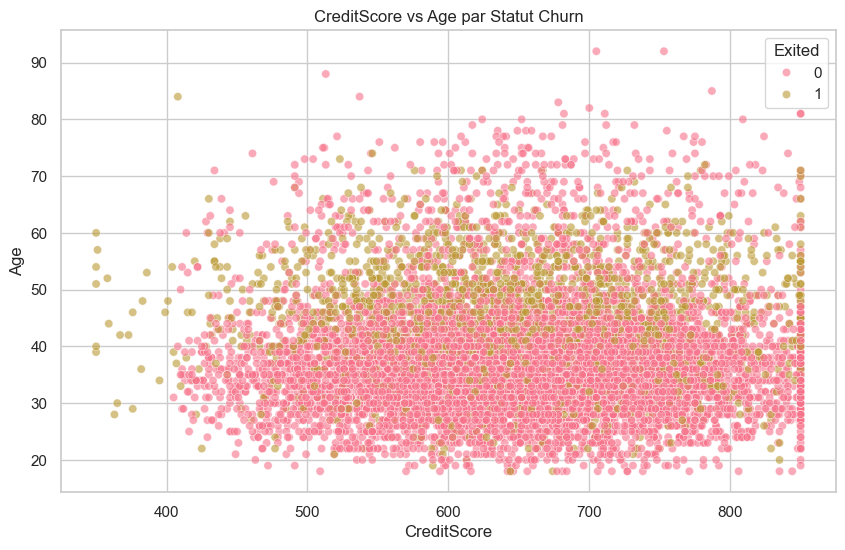

In [348]:
# Nuage de points CreditScore vs Age coloré par Exited
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CreditScore', y='Age', hue='Exited', alpha=0.6)
plt.title('CreditScore vs Age par Statut Churn')
plt.show()


ANALYSE UNIVARIÉE : VARIABLES NUMÉRIQUES


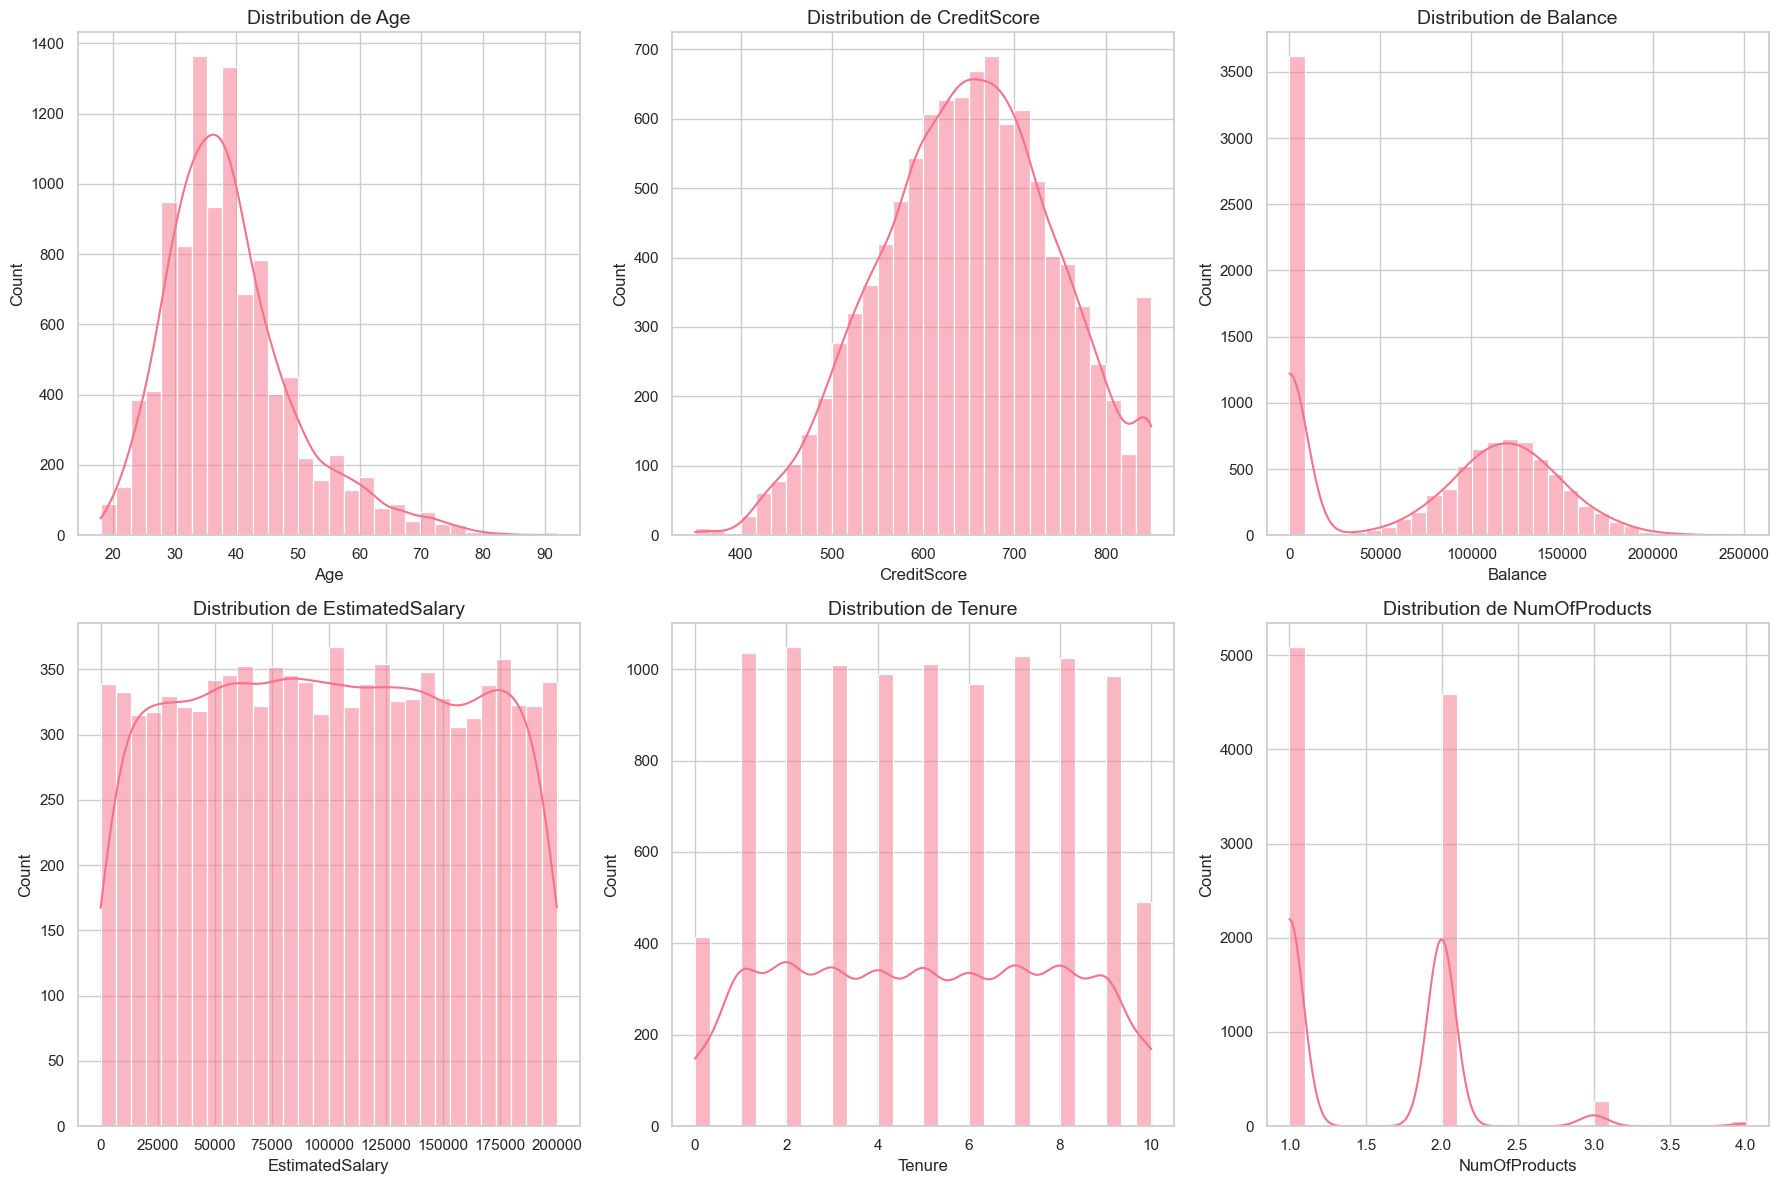


DÉTECTION D'OUTLIERS :


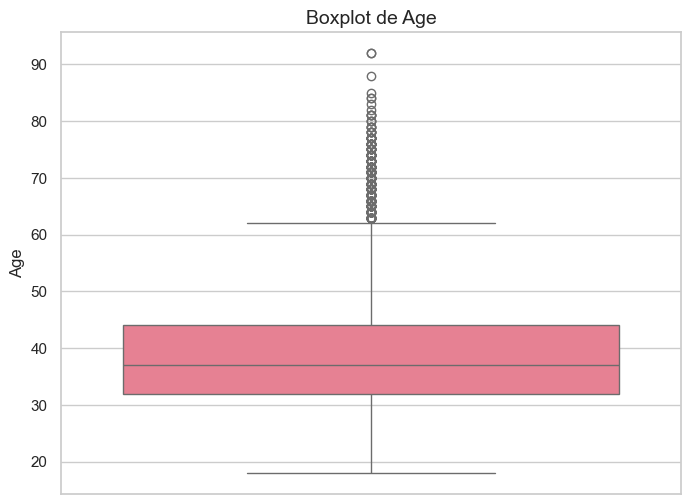

Age: 359 outliers (3.59%)


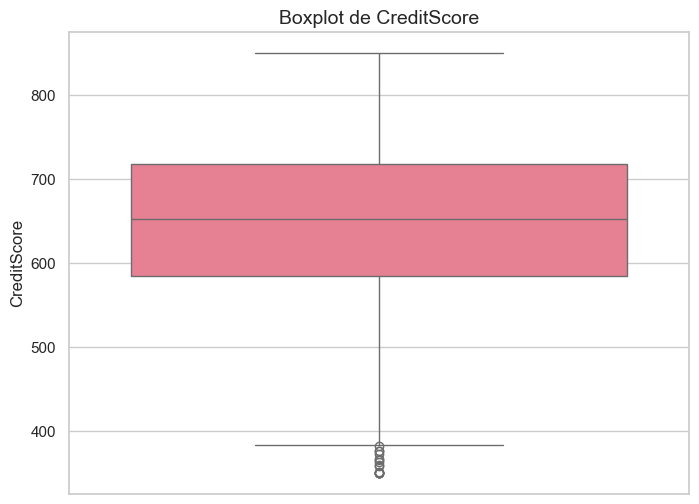

CreditScore: 15 outliers (0.15%)


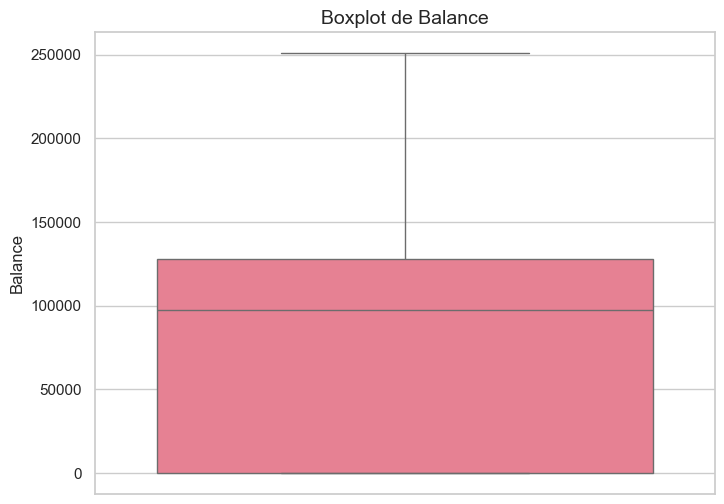

Balance: 0 outliers (0.00%)


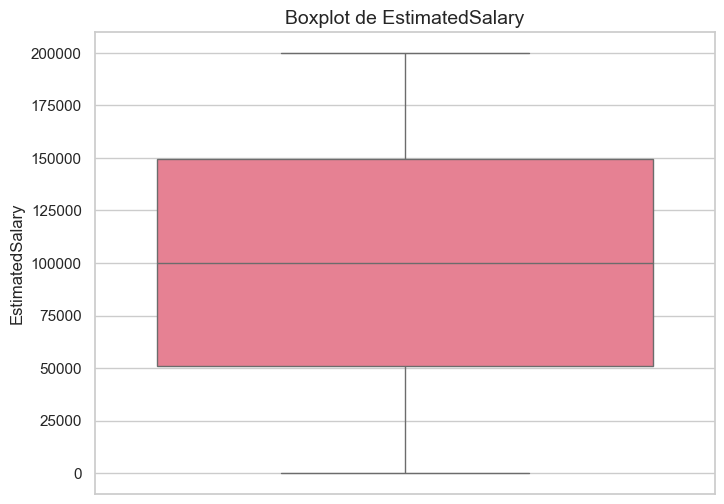

EstimatedSalary: 0 outliers (0.00%)


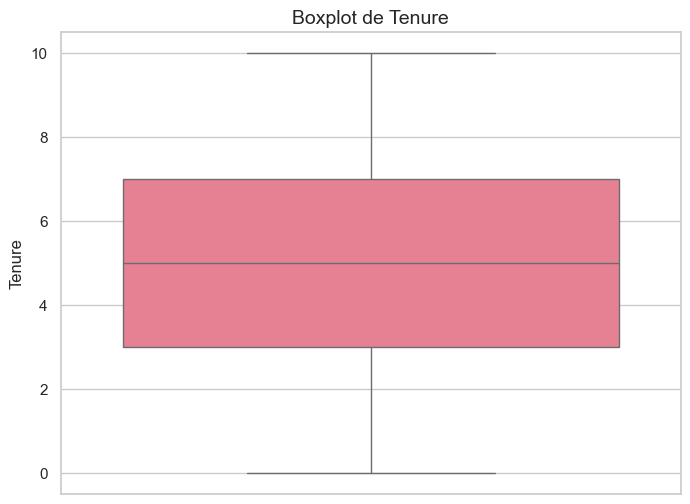

Tenure: 0 outliers (0.00%)


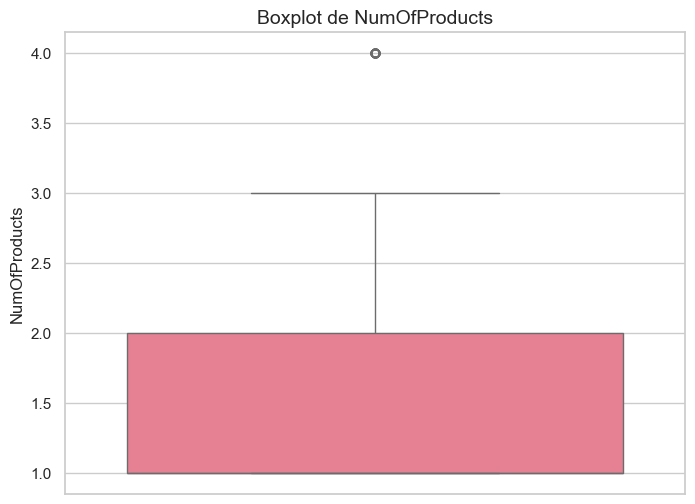

NumOfProducts: 60 outliers (0.60%)

ANALYSE UNIVARIÉE : VARIABLES CATÉGORIELLES


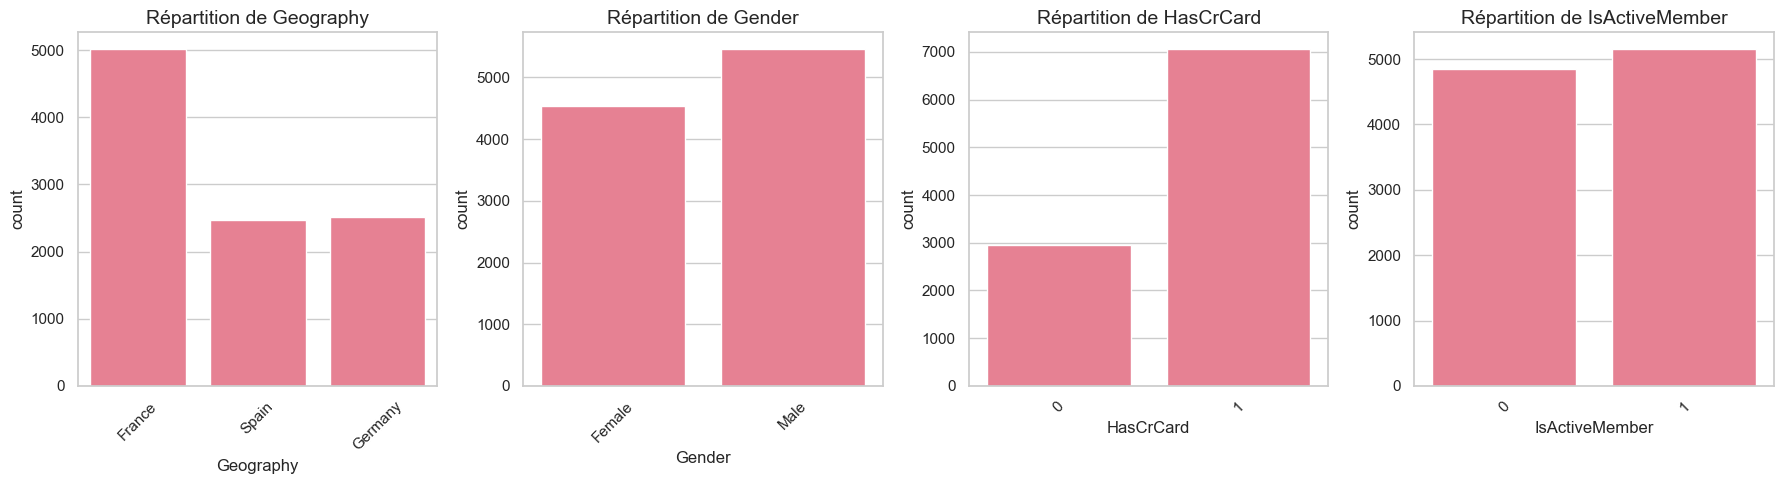


ANALYSE COMPARATIVE AVEC LA VARIABLE CIBLE (EXITED)


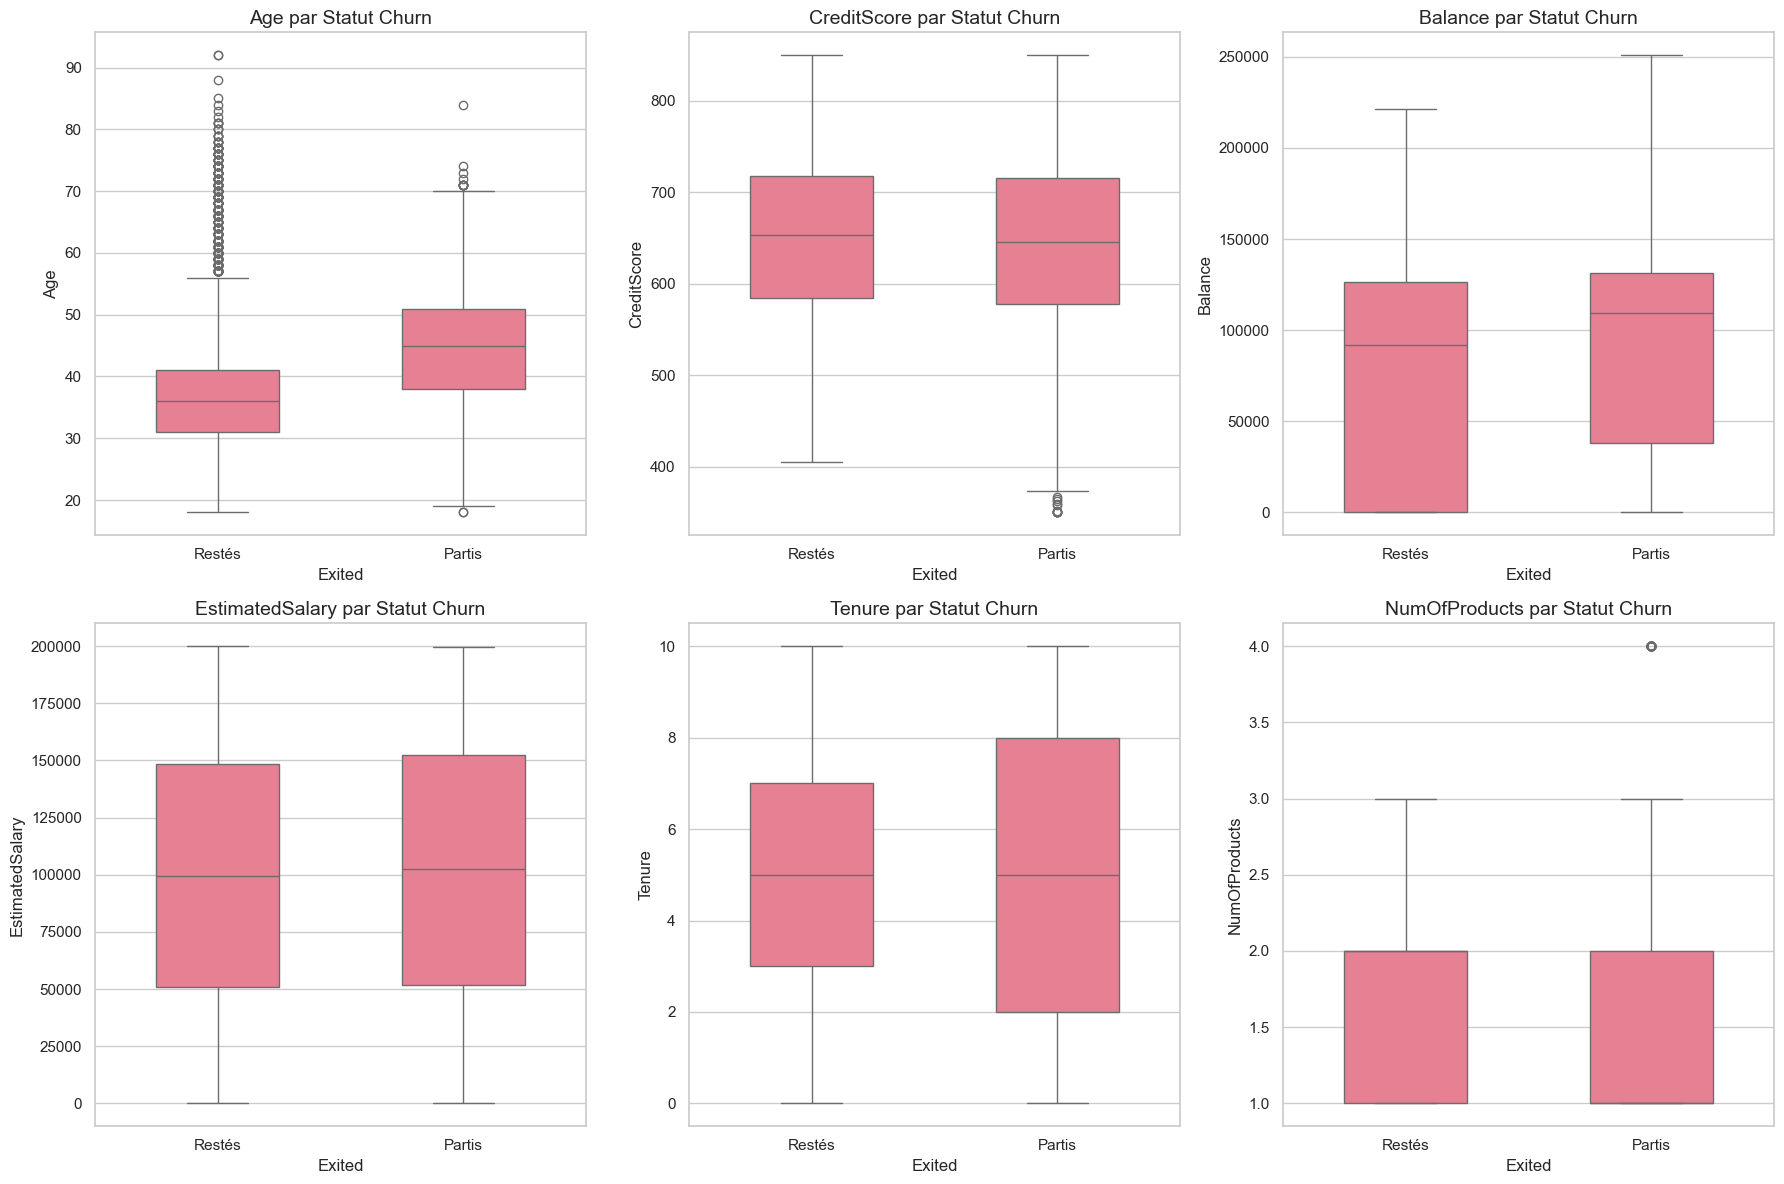

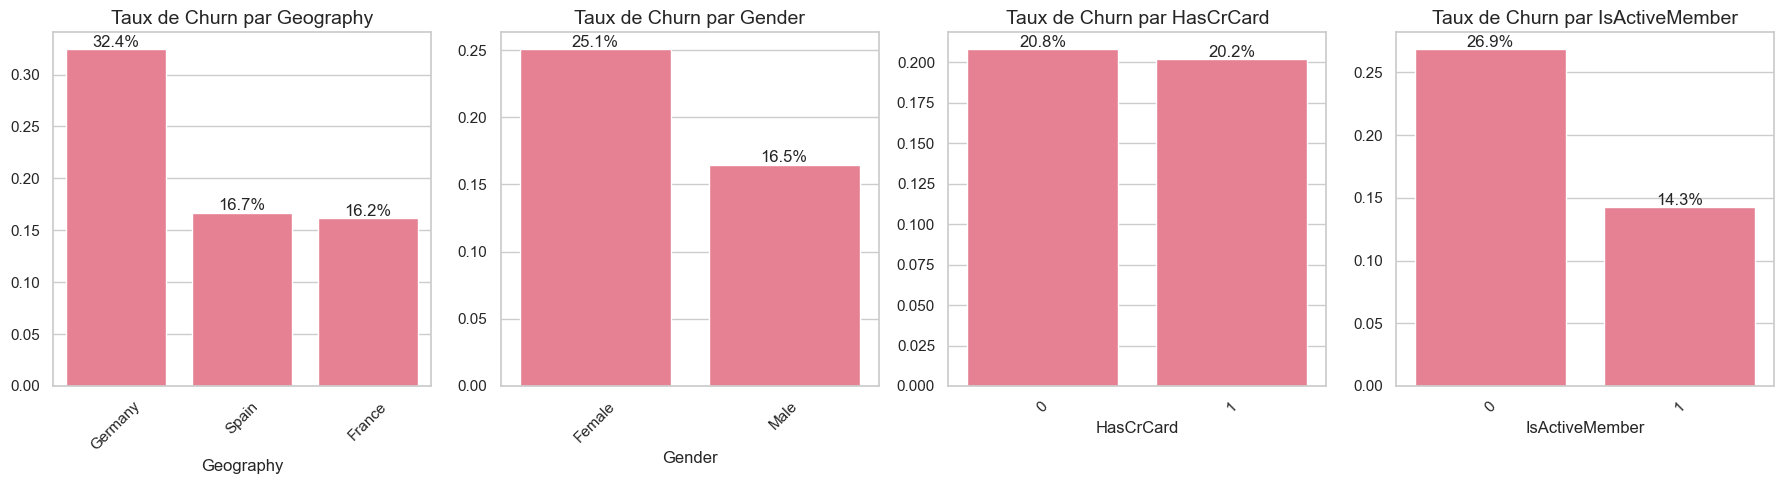


MATRICE DE CORRÉLATION


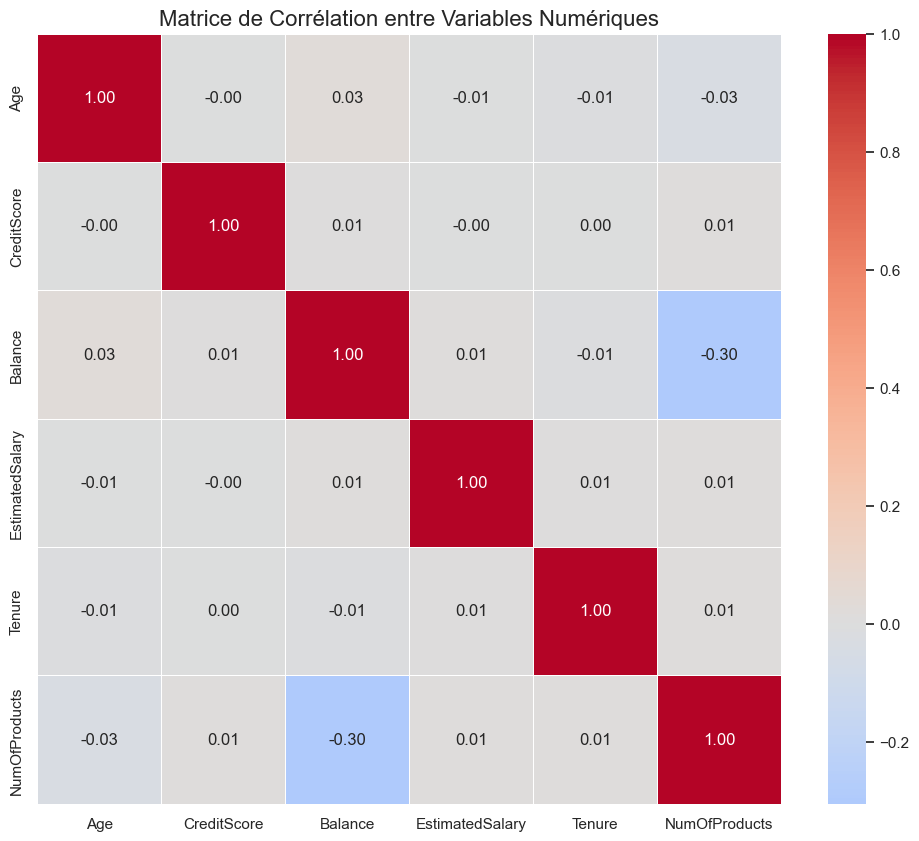


TRANSFORMATION DES VARIABLES ASYMÉTRIQUES

SKEWNESS AVANT TRANSFORMATION:
Age: 1.01 → Transformation recommandée
CreditScore: -0.07
Balance: -0.14
EstimatedSalary: 0.00
Tenure: 0.01
NumOfProducts: 0.75 → Transformation recommandée


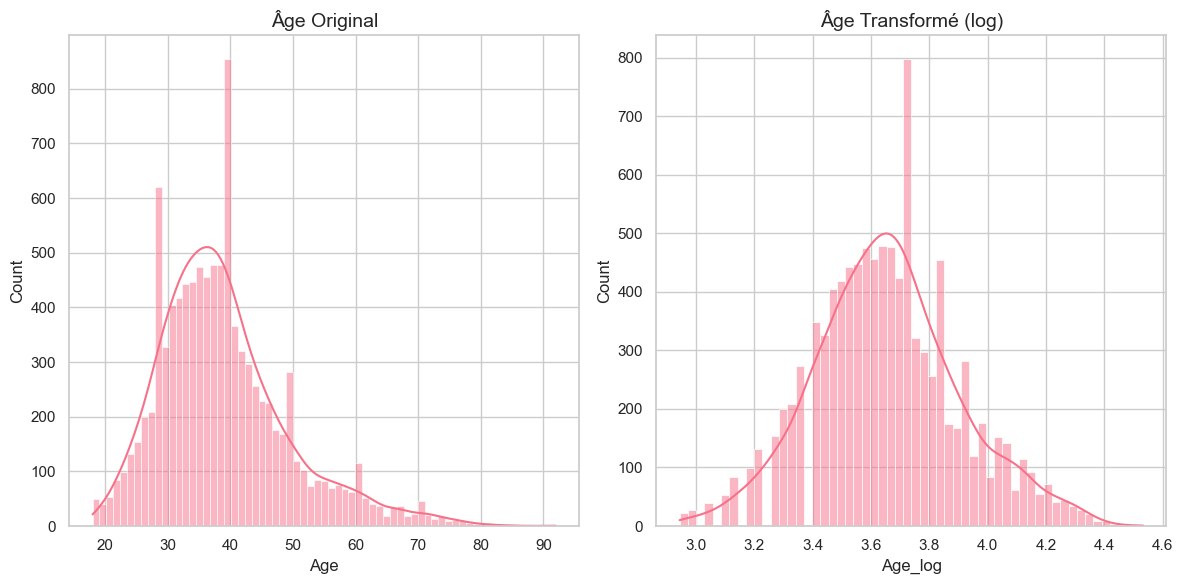


ANALYSE TERMINÉE AVEC SUCCÈS


In [350]:
# ======================
# CONFIGURATION INITIALE
# ======================
sns.set(style="whitegrid", 
        rc={'figure.figsize':(15,10)},
        palette="husl")

# Variables à analyser
num_vars = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# ====================================
# 1. ANALYSE UNIVARIÉE - NUMÉRIQUES
# ====================================
print("\nANALYSE UNIVARIÉE : VARIABLES NUMÉRIQUES")

# Histogrammes
plt.figure(figsize=(18,12))
for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=var, kde=True, bins=30)
    plt.title(f'Distribution de {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
plt.tight_layout()
plt.show()

# Boxplots et outliers
print("\nDÉTECTION D'OUTLIERS :")
for var in num_vars:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.show()
    
    # Calcul des outliers
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < (Q1 - 1.5*IQR)) | (df[var] > (Q3 + 1.5*IQR))]
    print(f"{var}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# ====================================
# 2. ANALYSE UNIVARIÉE - CATÉGORIELLES
# ====================================
print("\nANALYSE UNIVARIÉE : VARIABLES CATÉGORIELLES")

plt.figure(figsize=(18,5))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 4, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Répartition de {var}', fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ====================================
# 3. ANALYSE BIVARIÉE AVEC EXITED
# ====================================
print("\nANALYSE COMPARATIVE AVEC LA VARIABLE CIBLE (EXITED)")

# Boxplots numériques vs Exited
plt.figure(figsize=(18, 12))
for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(data=df, x='Exited', y=var, width=0.5)
    plt.title(f'{var} par Statut Churn', fontsize=14)
    plt.xticks([0, 1], ['Restés', 'Partis'])
plt.tight_layout()
plt.show()

# Taux de churn par catégorie
plt.figure(figsize=(18, 5))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 4, i)
    churn_rate = df.groupby(var)['Exited'].mean().sort_values(ascending=False)
    ax = sns.barplot(x=churn_rate.index, y=churn_rate.values)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Taux de Churn par {var}', fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ====================================
# 4. MATRICE DE CORRÉLATION
# ====================================
print("\nMATRICE DE CORRÉLATION")

plt.figure(figsize=(12,10))
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, annot_kws={"size": 12})
plt.title('Matrice de Corrélation entre Variables Numériques', fontsize=16)
plt.show()

# ====================================
# 5. TRANSFORMATION DES VARIABLES
# ====================================
print("\nTRANSFORMATION DES VARIABLES ASYMÉTRIQUES")

# Analyse de skewness
print("\nSKEWNESS AVANT TRANSFORMATION:")
for var in num_vars:
    skew_val = df[var].skew()
    print(f"{var}: {skew_val:.2f}", end="")
    if abs(skew_val) > 0.5:
        print(" → Transformation recommandée")
    else:
        print()

# Transformation de l'âge (exemple)
if 'Age' in num_vars:
    df['Age_log'] = np.log1p(df['Age'])
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(df['Age'], kde=True)
    plt.title('Âge Original', fontsize=14)
    
    plt.subplot(1,2,2)
    sns.histplot(df['Age_log'], kde=True)
    plt.title('Âge Transformé (log)', fontsize=14)
    plt.tight_layout()
    plt.show()

print("\nANALYSE TERMINÉE AVEC SUCCÈS")

In [347]:
for var in num_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Variable: {var}")
    print(f"Nombre d'outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print("------")

Variable: Age
Nombre d'outliers: 359 (3.59%)
------
Variable: CreditScore
Nombre d'outliers: 15 (0.15%)
------
Variable: Balance
Nombre d'outliers: 0 (0.00%)
------
Variable: EstimatedSalary
Nombre d'outliers: 0 (0.00%)
------
Variable: Tenure
Nombre d'outliers: 0 (0.00%)
------
Variable: NumOfProducts
Nombre d'outliers: 60 (0.60%)
------


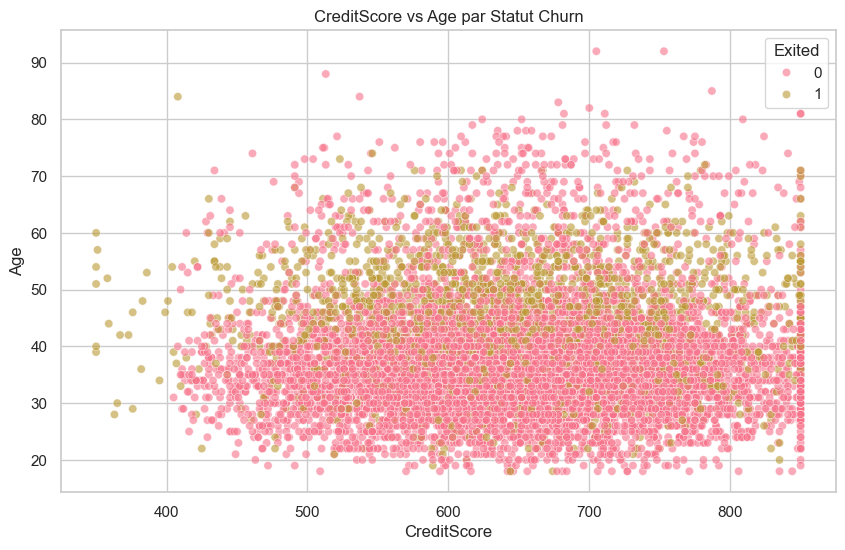

In [351]:
# Nuage de points CreditScore vs Age coloré par Exited
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CreditScore', y='Age', hue='Exited', alpha=0.6)
plt.title('CreditScore vs Age par Statut Churn')
plt.show()

Skewness de Age: 1.01
→ Distribution fortement asymétrique, transformation recommandée
Skewness de CreditScore: -0.07
Skewness de Balance: -0.14
Skewness de EstimatedSalary: 0.00


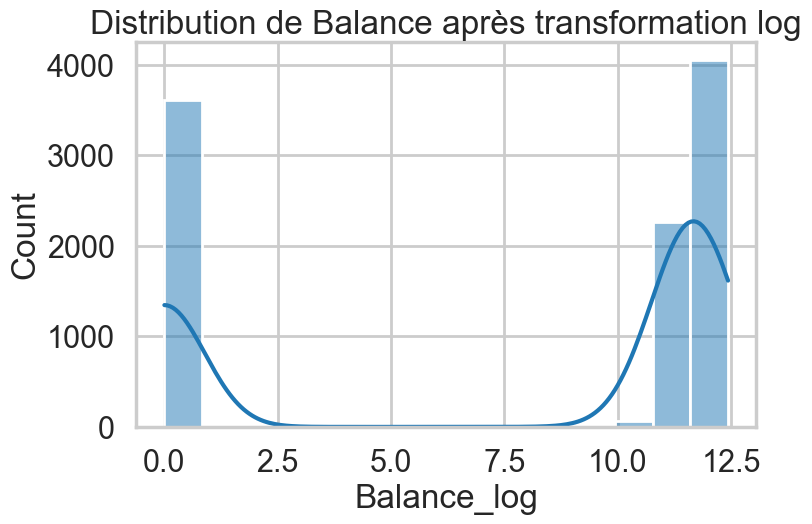

In [338]:
# Calcul de la skewness
for var in num_vars:
    skewness = df[var].skew()
    print(f"Skewness de {var}: {skewness:.2f}")
    if abs(skewness) > 1:
        print(f"→ Distribution fortement asymétrique, transformation recommandée")

# Transformation log pour variables asymétriques (exemple)
df['Balance_log'] = np.log1p(df['Balance'])  # log1p pour gérer les zeros
sns.histplot(df['Balance_log'], kde=True)
plt.title('Distribution de Balance après transformation log')
plt.show()

In [ ]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df['Exited'] == 0]  # Clients restés
df_1 = df[df['Exited'] == 1]  # Clients partis

In [ ]:
df_0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [ ]:
df_1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


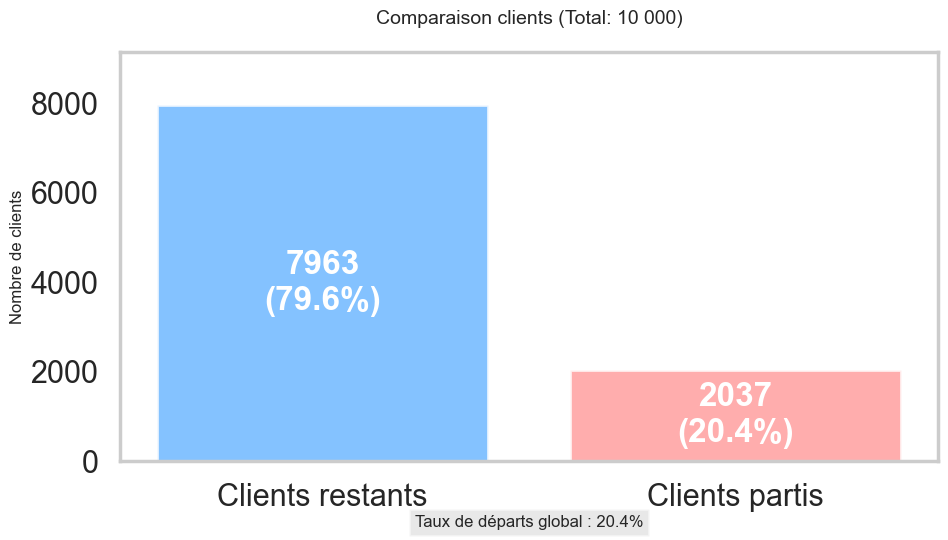

In [ ]:
# Données
groupes = ['Clients restants', 'Clients partis']
tailles = [len(df_0), len(df_1)]  # len(df_0), len(df_1)
couleurs = ['#66b3ff', '#ff9999']
total = sum(tailles)
ratio_pourcentage = (tailles[1] / total) * 100  # 20.37%

# Création du bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(groupes, tailles, color=couleurs, alpha=0.8)

# Étiquettes de valeur absolue (dans la barre)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height/2,  # Position au milieu de la barre
        f'{int(height)}\n({height/total:.1%})',  # Ex: "7963 (79.6%)"
        ha='center', 
        va='center',
        color='white',
        fontweight='bold'
    )

# Titre et labels
plt.title('Comparaison clients (Total: 10 000)', pad=20, fontsize=14)
plt.ylabel('Nombre de clients', fontsize=12)
plt.ylim(0, max(tailles) * 1.15)  # Marge pour éviter les débordements

# Supprimer la grid pour plus de clarté
plt.grid(False)

# Afficher le ratio global
plt.text(
    0.5, -0.15,  # Position sous le graphique
    f'Taux de départs global : {ratio_pourcentage:.1f}%',
    ha='center',
    va='center',
    transform=plt.gca().transAxes,  # Coordonnées relatives
    fontsize=12,
    bbox=dict(facecolor='lightgray', alpha=0.5)
)

plt.tight_layout()
plt.show()

le ratio est correcte, pas besoin de faire une balance

## Hypothesis 1: Age

In [ ]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

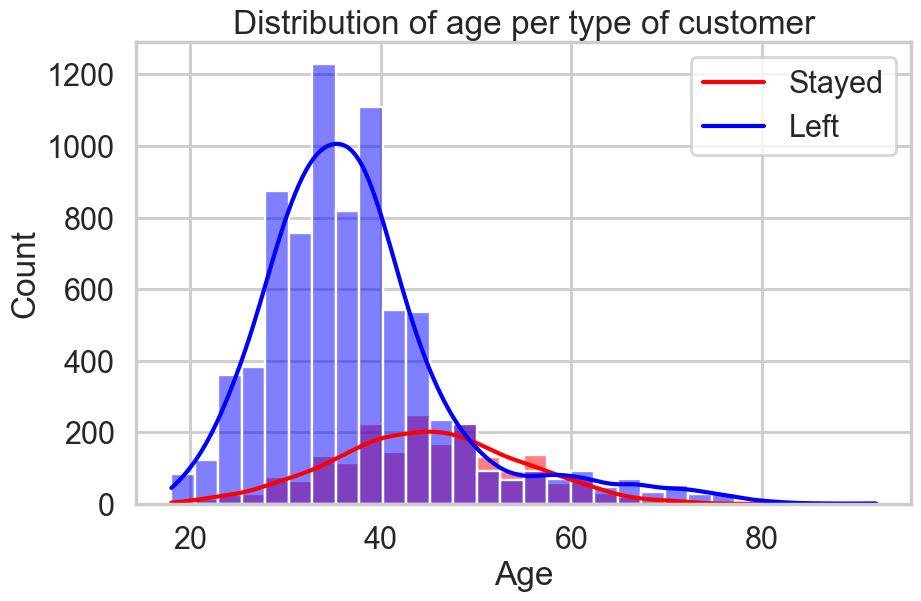

Taille colonne âge des clients restants
7963
Taille colonne âge des clients partis
2037


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('Distribution of age per type of customer')
plt.legend(['Stayed', 'Left'])
plt.show()

print("Taille colonne âge des clients restants")
print(len(df_0['Age']))

print("Taille colonne âge des clients partis")
print(len(df_1['Age']))



In [ ]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.

In [ ]:
age_0_mean = df_0['Age'].mean()
age_0_std = df_0['Age'].std()


print(f"\nAverage age (stayed): {age_0_mean:.2f} ± {age_0_std:.2f}")



Average age (stayed): 37.41 ± 10.13


In [ ]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.

In [ ]:
age_1_mean = df_1['Age'].mean()
age_1_std = df_1['Age'].std()

print(f"Average age (left): {age_1_mean:.2f} ± {age_1_std:.2f}")

Average age (left): 44.84 ± 9.76


In [ ]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

In [ ]:
t_stat_age, p_val_age = ttest_ind(df_0['Age'], df_1['Age'])
print(f"\nTest t for age: t = {t_stat_age:.2f}, p = {p_val_age:.4f}")



Test t for age: t = -29.77, p = 0.0000


Définition de ttest_ ind : Test t pour échantillons indépendants
Moyenne1 = Moyenne2	

H0 : Les âges des clients partis et restés sont similaires.
H1 : Les âges sont différents.


### Using Bootstrapping

In [ ]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_sample)
    return bs_s


In [ ]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.

In [ ]:
overall_mean = df['Age'].mean()
age_0_shifted = df_0['Age'] - df_0['Age'].mean() + overall_mean
age_1_shifted = df_1['Age'] - df_1['Age'].mean() + overall_mean

C'est une technique utilisée avant de faire un test statistique pour :

    Supprimer l'effet de la différence de moyenne entre les groupes.

    Vérifier si les différences observées sont dues au hasard ou à un vrai phénomène.

In [ ]:
age_0_shifted

1       42.513411
3       40.513411
4       44.513411
6       51.513411
8       45.513411
          ...    
9993    29.513411
9994    30.513411
9995    40.513411
9996    36.513411
9999    29.513411
Name: Age, Length: 7963, dtype: float64

In [ ]:
age_0_shifted.mean()

np.float64(38.9218)

In [ ]:
age_1_shifted

0       36.083803
2       36.083803
5       38.083803
7       23.083803
16      52.083803
          ...    
9981    36.083803
9982    40.083803
9991    47.083803
9997    30.083803
9998    36.083803
Name: Age, Length: 2037, dtype: float64

In [ ]:
age_1_shifted.mean()

np.float64(38.92179999999999)

In [ ]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

In [ ]:
bs_0 = bs_choice(age_0_shifted, np.mean, 10000)
bs_1 = bs_choice(age_1_shifted, np.mean, 10000)
bs_diff = bs_0 - bs_1

In [ ]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

In [ ]:
observed_diff = age_1_mean - age_0_mean
p_val_bs = (np.abs(bs_diff) >= np.abs(observed_diff)).mean()
print(f"p-value bootstrap: {p_val_bs:.4f}")

p-value bootstrap: 0.0000


la p-value bootstrap = 0.0000 est identique à celle du T test. Cela confirme que la moyenne des âges entre les clients qui sont restés et ceux qui sont partis est très clairement différentes 

### Conclusion


H0 : the distribution of the age is similar
H1 : the distribution of the age is différents.

The hypothesis is rejected, the p-value is clearly under 0.05 so the distribution of age are clearly different between the customer who stay and whom left.

## Hypothesis 2: Credit Score

In [ ]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

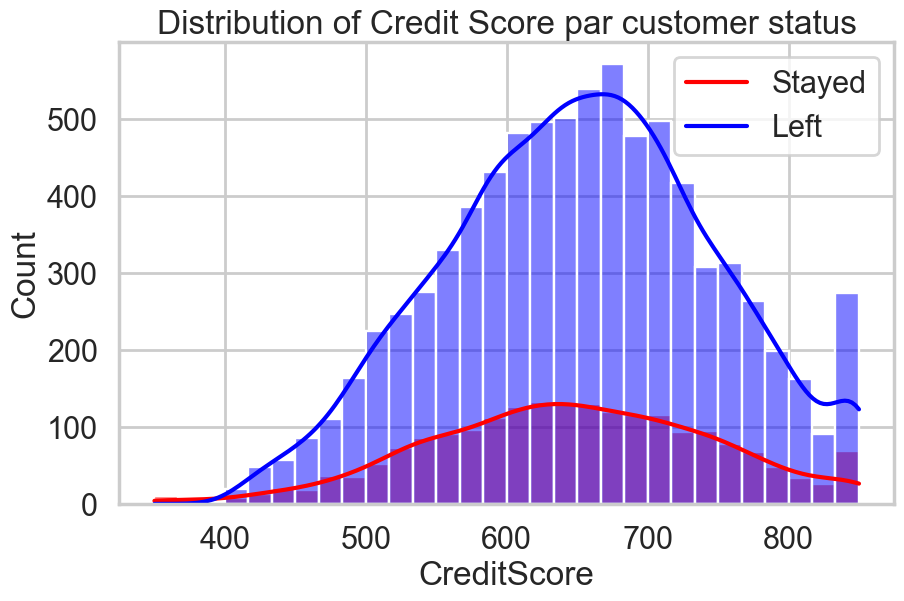

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('Distribution of Credit Score par customer status')
plt.legend(['Stayed', 'Left'])
plt.show()

In [ ]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

In [ ]:
t_stat_cs, p_val_cs = ttest_ind(df_0['CreditScore'], df_1['CreditScore'])
print(f"\nTest t pour Credit Score: t = {t_stat_cs:.2f}, p = {p_val_cs:.4f}")


Test t pour Credit Score: t = 2.71, p = 0.0067


H0 : Distribution of Credit Score par customer status is similar.
H1 : Distribution of Credit Score par customer status is different.

The hypothesis is rejected, the p-value is clearly under 0.05 so the credit score are clearly different

## Hypothesis 3: Balance

In [ ]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

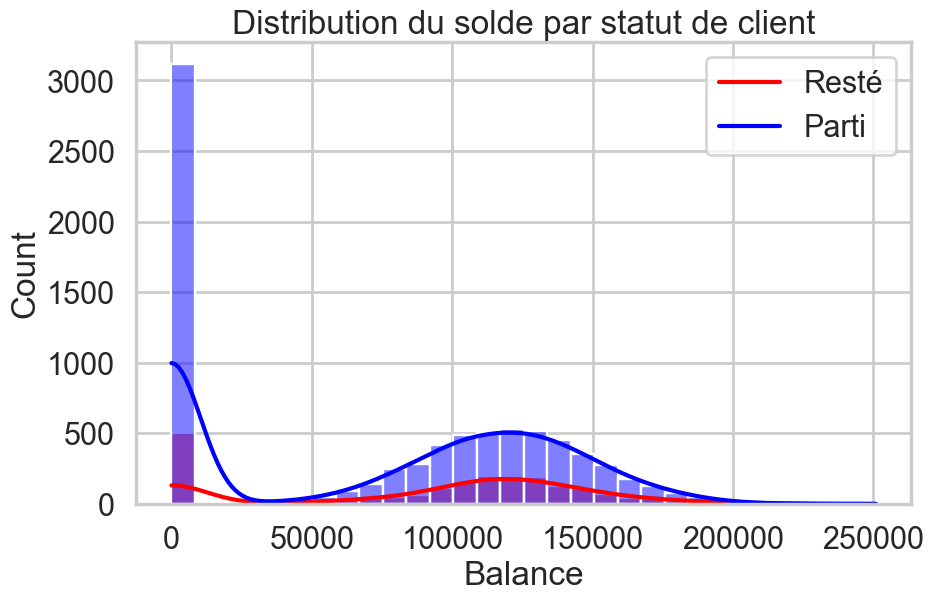

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', hue='Exited', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('Distribution du solde par statut de client')
plt.legend(['Resté', 'Parti'])
plt.show()

In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.

In [ ]:
t_stat_bal, p_val_bal = ttest_ind(df_0['Balance'], df_1['Balance'])
print(f"\nTest t pour Balance: t = {t_stat_bal:.2f}, p = {p_val_bal:.4f}")



Test t pour Balance: t = -11.94, p = 0.0000


H0 : Le solde des comptes est similaire.
H1 : Il est différent.

Le solde des comptes est différent en prenant en compte les soldes à zéro.

In [ ]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

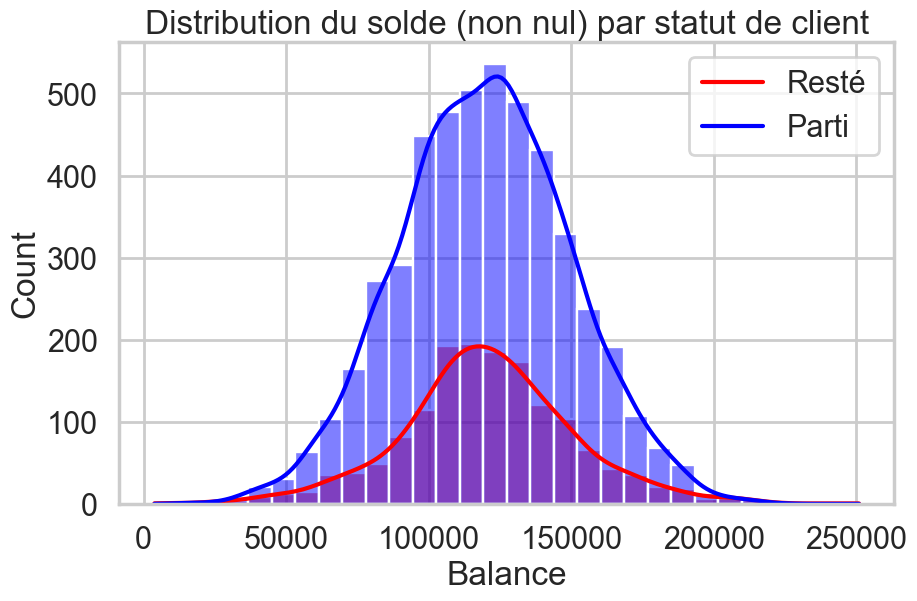

In [ ]:
df_balance_nonzero = df[df['Balance'] > 0]
df_0_nz = df_balance_nonzero[df_balance_nonzero['Exited'] == 0]
df_1_nz = df_balance_nonzero[df_balance_nonzero['Exited'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_balance_nonzero, x='Balance', hue='Exited', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('Distribution du solde (non nul) par statut de client')
plt.legend(['Resté', 'Parti'])
plt.show()

In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

In [ ]:
t_stat_bal_nz, p_val_bal_nz = ttest_ind(df_0_nz['Balance'], df_1_nz['Balance'])
print(f"\nTest t pour Balance (non nulles): t = {t_stat_bal_nz:.2f}, p = {p_val_bal_nz:.4f}")


Test t pour Balance (non nulles): t = -1.37, p = 0.1692


H0 : Le solde des comptes est similaire.
H1 : Il est différent.

La distribution des comptes est différente en prenant en compte les soldes à zéro

## Hypothesis 4: Estimated Salary

In [ ]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

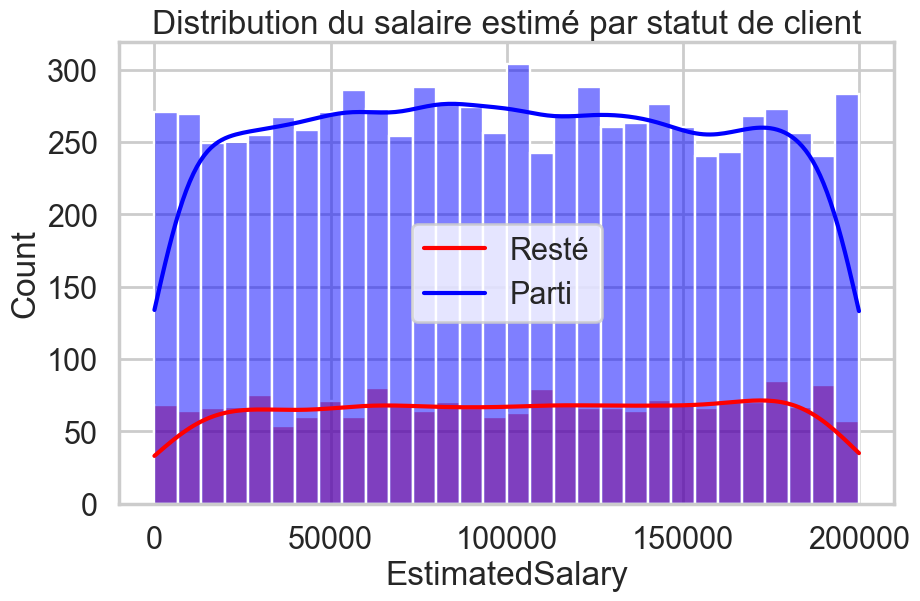

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('Distribution du salaire estimé par statut de client')
plt.legend(['Resté', 'Parti'])
plt.show()


In [ ]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

In [ ]:
t_stat_sal, p_val_sal = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'])
print(f"\nTest t pour Estimated Salary: t = {t_stat_sal:.2f}, p = {p_val_sal:.4f}")


Test t pour Estimated Salary: t = -1.21, p = 0.2264


H0 : Les salaires estimés sont similaires.
H1 : Ils sont différents.
les salaires estimés sont différents

### Using Bootstrapping

In [ ]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.

In [ ]:
overall_mean_sal = df['EstimatedSalary'].mean()
sal_0_shifted = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + overall_mean_sal
sal_1_shifted = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + overall_mean_sal

In [ ]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

In [ ]:
bs_sal_0 = bs_choice(sal_0_shifted, np.mean, 10000)
bs_sal_1 = bs_choice(sal_1_shifted, np.mean, 10000)
bs_diff_sal = bs_sal_0 - bs_sal_1

In [ ]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

In [ ]:
observed_diff_sal = df_1['EstimatedSalary'].mean() - df_0['EstimatedSalary'].mean()
p_val_bs_sal = (np.abs(bs_diff_sal) >= np.abs(observed_diff_sal)).mean()
print(f"p-value bootstrap pour Estimated Salary: {p_val_bs_sal:.4f}")

p-value bootstrap pour Estimated Salary: 0.2291


la p-value bootstrap = 0.0.2253 confirme celle du T test (0.2264). Cela confirme que la moyenne des salaires entre les clients qui sont restés et ceux qui sont partis est très clairement différentes 

## Final Conclusion
What will be the most helpful feature in predicting churning?

Most Significant Predictors of Churn			
            
Feature	Statistical Significance	   Direction of Effect	                     
Age	p ≈ 0.0000	                       Older customers more likely to leave	     
Balance	p < 0.05 (with/without zeros)  Higher balances correlate with churn	     
Credit Score	p < 0.05	           Lower scores associated with churn	    
            
            
Non-Significant Factor			
            
Feature	Bootstrap p-value	Interpretation	
Estimated Salary	0.2253	No evidence salary affects churn	
            
            

Key Findings:
1. Age: Strongly significant difference (p ≈ 0.0000)
2. Credit Score: Significant difference (p < 0.05)
3. Balance: Significant difference (both including/excluding zeros)
4. Salary: Not significant (bootstrap p = 0.2253)

Most predictive features of churn:
- Age (most significant)
- Account Balance
- Credit Score

Next step :

Dig further why older customer leave the bank. so make a deeper dive on the different feature linked to the age
the same for account balance and credit score

perhaps create a behavior analysis on targeted age group splited between staying customer and leaving.